In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from scipy.optimize import curve_fit
from scipy.linalg import orth
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/wheetseeds.csv")

# 2D Plot

In [ ]:
x = df.loc[:,["Area","Perimeter", "Class"]]
y = x.to_numpy()

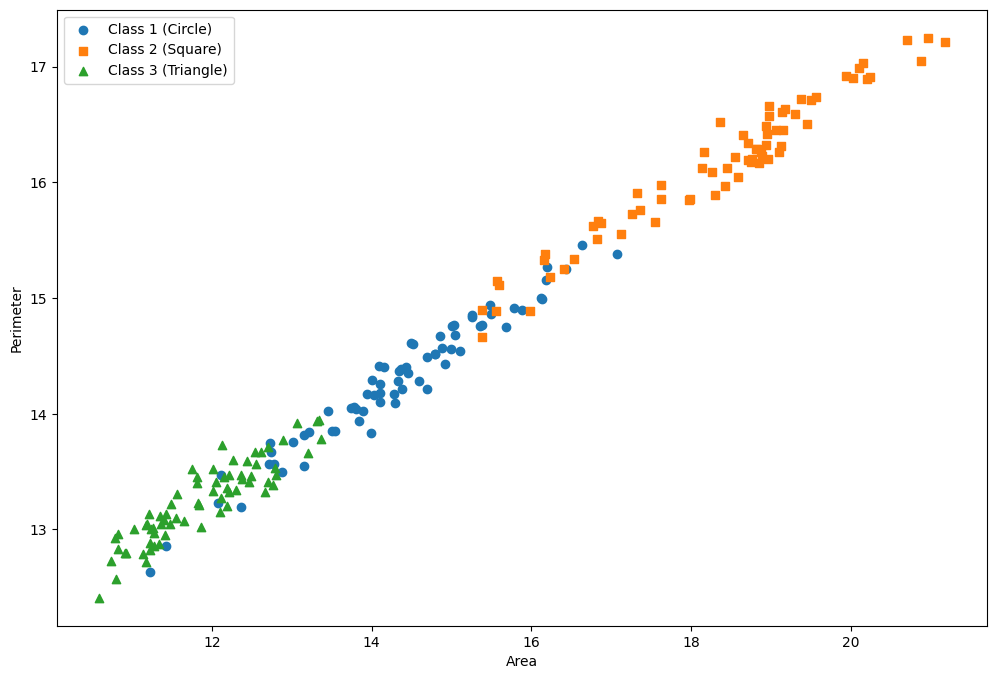

In [ ]:
# Q2
# Separate data by class
class1 = x.loc[x.Class == 1,["Area","Perimeter"]].to_numpy()
class2 = x.loc[x.Class == 2,["Area","Perimeter"]].to_numpy()
class3 = x.loc[x.Class == 3,["Area","Perimeter"]].to_numpy()

# Create a 3D plot
fig = plt.figure(figsize = (12,8))
ax = fig.subplots()

# Plot data points with different shapes
ax.scatter(*zip(*class1), marker='o', label='Class 1 (Circle)')
ax.scatter(*zip(*class2), marker='s', label='Class 2 (Square)')
ax.scatter(*zip(*class3), marker='^', label='Class 3 (Triangle)')

# Set labels for each axis
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')

ax.legend()
plt.show()

[14.33442857 14.29428571]
[18.33428571 16.13571429]
[11.87385714 13.24785714]


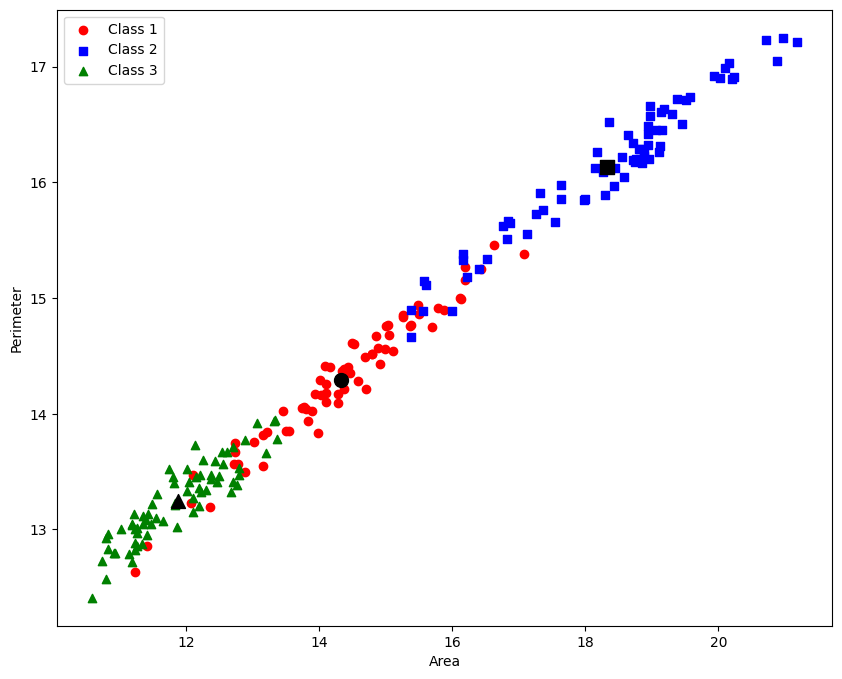

In [ ]:
# Q3
# Separate data by class
class1 = x.loc[x.Class == 1,["Area","Perimeter"]].to_numpy()
class2 = x.loc[x.Class == 2,["Area","Perimeter"]].to_numpy()
class3 = x.loc[x.Class == 3,["Area","Perimeter"]].to_numpy()

class1_mean = np.mean(class1, axis=0)
class2_mean = np.mean(class2, axis=0)
class3_mean = np.mean(class3, axis=0)

print(class1_mean)
print(class2_mean)
print(class3_mean)


# # Create a 3D plot
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot()

# Plot data points with different shapes
ax.scatter(class1[:, 0], class1[:, 1], marker='o', label='Class 1', color="r")
ax.scatter(class2[:, 0], class2[:, 1], marker='s', label='Class 2', color="b")
ax.scatter(class3[:, 0], class3[:, 1], marker='^', label='Class 3', color="g")

# mean
ax.scatter(class1_mean[0], class1_mean[1], s=100, marker='o', color='black')
ax.scatter(class2_mean[0], class2_mean[1], s=100, marker='s', color='black')
ax.scatter(class3_mean[0], class3_mean[1], s=100, marker='^', color='black')

# Set labels for each axis
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')

ax.legend()
plt.show()

In [ ]:
D = df.loc[:,['Area', 'Perimeter']].to_numpy()

# Mean Vector
mean_vector = np.mean(D, axis = 0)

# Centered data matrix
centered2d= D-mean_vector

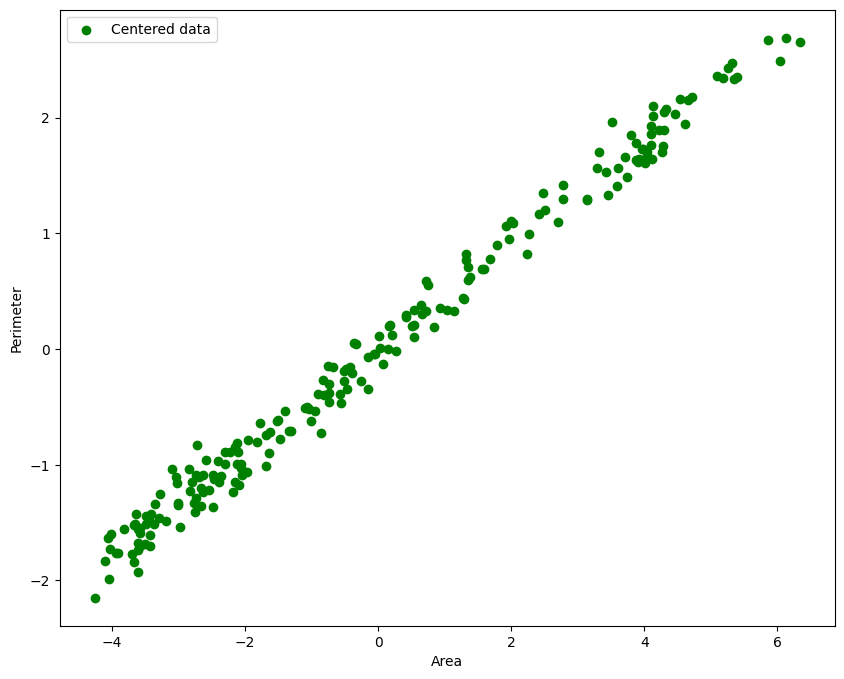

In [ ]:
# Q4
# for ploting graph
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot()

# plot centered data set
ax.scatter(centered2d[:, 0], centered2d[:, 1], marker='o', label='Centered data', color="g")


# Set labels for each axis
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')

ax.legend()
plt.show()

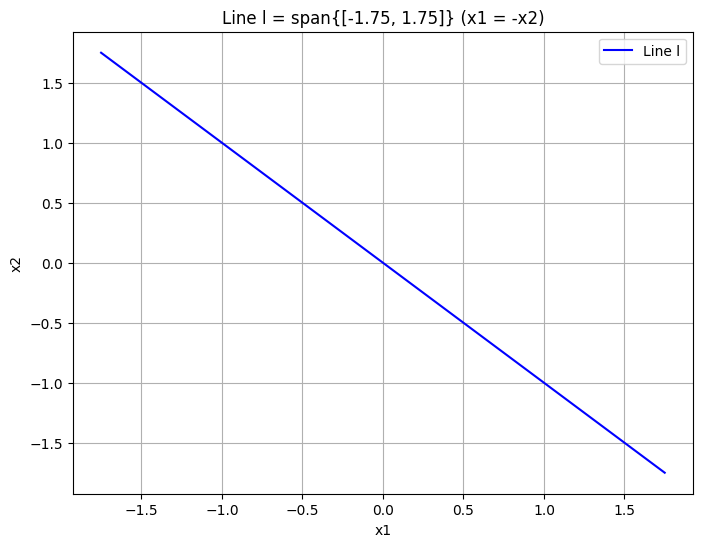

In [ ]:
#Q5
x1 = np.linspace(-1.75, 1.75, 100)  # Adjust the range and number of points as needed

# Calculate x2 using the equation x1 = -x2
x2 = -x1

# Create a plot
plt.figure(figsize=(8, 6))

# Plot the line l
plt.plot(x1, x2, label='Line l', color='blue')

# Add labels and a title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Line l = span{[-1.75, 1.75]} (x1 = -x2)')

# Show the plot with a legend
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

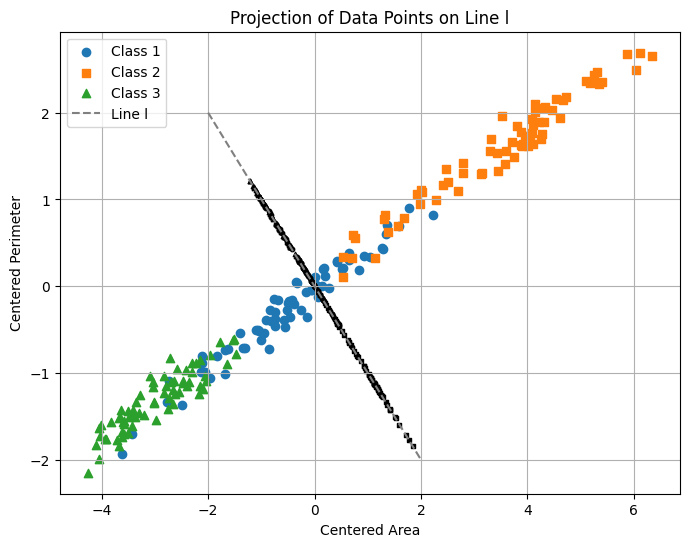

In [ ]:
centered_area = D[:, 0] - np.mean(D[:, 0])
centered_perimeter = D[:, 1] - np.mean(D[:, 1])

# Define the line vector [-1.75 1.75]
line_vector = np.array([-1.75, 1.75])

# Calculate the projection of each data point onto the line
projections = np.dot(np.column_stack((centered_area, centered_perimeter)), line_vector)
# Create an empty list to store the projection vectors
projection_list = []

# Calculate the projection for each data point
for i in range(len(projections)):
    projection = (projections[i] / np.dot(line_vector, line_vector)) * line_vector
    projection_list.append(projection)

# Convert the list of projection vectors to a NumPy array
projections = np.array(projection_list)
# Create a new plot for centered data
plt.figure(figsize=(8, 6))

# Plot centered data points

class_to_shape = {
    1: 'o',  # Circle
    2: 's',  # Square
    3: '^',  # Triangle
}

for class_label, shape in class_to_shape.items():
    class_indices = (y[:, -1] == class_label)
    plt.scatter(centered_area[class_indices], centered_perimeter[class_indices], marker=shape, label=f'Class {class_label}')

    # Plot the projected points on the line with the same shape but smaller size
    class_projections = projections[class_indices]

    for i in range(len(class_projections)):
        projection = class_projections[i]
        plt.scatter(projection[0], projection[1], marker=shape, s=10, color='black')

# Plot the line l: x1 = -x2
plt.plot([-2, 2], [2, -2], color='gray', linestyle='--', label='Line l')

# Add labels and a title
plt.xlabel('Centered Area')
plt.ylabel('Centered Perimeter')
plt.title('Projection of Data Points on Line l')

# Show the plot with legend
plt.legend()
plt.grid(True)
plt.show()

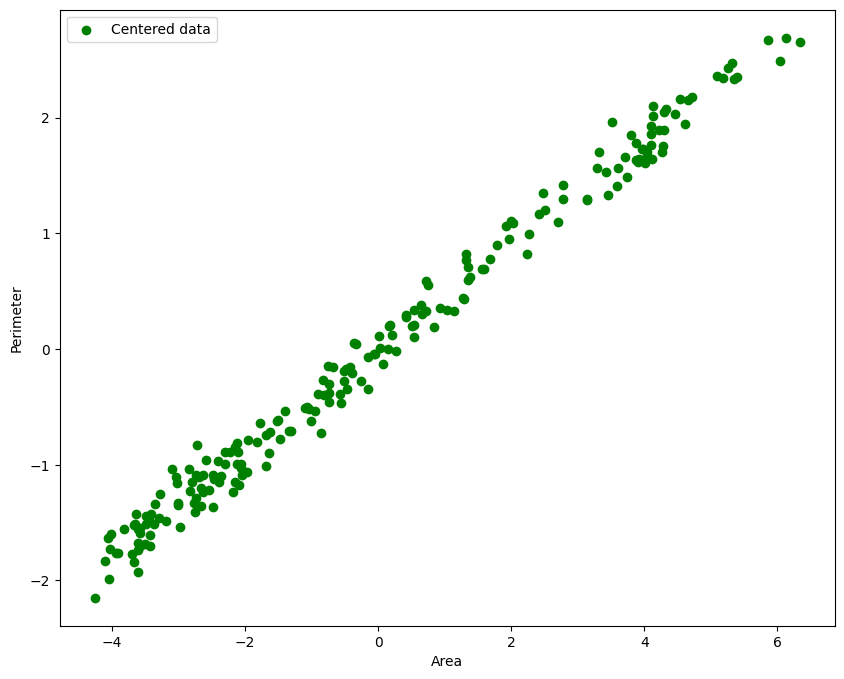

In [ ]:
# Q6
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot()

# plot centered data set
ax.scatter(centered2d[:, 0], centered2d[:, 1], marker='o', label='Centered data', color="g")


# Set labels for each axis
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')

ax.legend()
plt.show()

In [ ]:
#Q7-1
cov_2d = np.dot(centered2d.T,centered2d)/len(centered2d)
print(cov_2d)

[[8.42603482 3.76045061]
 [3.76045061 1.69740663]]


In [ ]:
#Q7-2
s_2d=len(centered2d)*cov_2d
print(s_2d)

[[1769.46731238  789.69462857]
 [ 789.69462857  356.45539286]]


In [ ]:
#Q7-3
eigenvalues_2d, eigenvectors_2d = np.linalg.eig(s_2d)
print(eigenvectors_2d)
print()
print(eigenvalues_2d)

[[ 0.912897   -0.40818998]
 [ 0.40818998  0.912897  ]]

[2122.56895809    3.35374715]


In [ ]:
#Q7-4
if not np.allclose(np.eye(len(eigenvectors_2d)), np.dot(eigenvectors_2d.T, eigenvectors_2d)):
    eigenvectors_2d = orth(eigenvectors_2d)
print(eigenvectors_2d)

[[ 0.912897   -0.40818998]
 [ 0.40818998  0.912897  ]]


In [ ]:
#Q7-5
u_2d= eigenvectors_2d[:, np.argmax(eigenvalues_2d)]
print(u_2d)

[0.912897   0.40818998]


In [ ]:
#Q7-6
projected_points_2d = np.dot(centered2d, u_2d)
print(projected_points_2d)

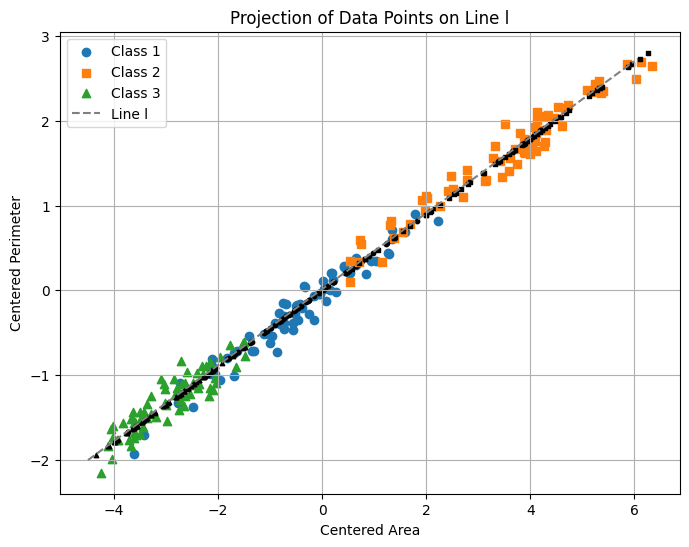

In [ ]:
#Q-7
projection_list = []

# Calculate the projection for each data point
for i in range(len(projections)):
    projection = (projected_points_2d[i] / np.dot(u_2d, u_2d)) * u_2d
    projection_list.append(projection)

# Convert the list of projection vectors to a NumPy array
projections = np.array(projection_list)

# Create a new plot for centered data
plt.figure(figsize=(8, 6))

# Plot centered data points

class_to_shape = {
    1: 'o',  # Circle
    2: 's',  # Square
    3: '^',  # Triangle
}

for class_label, shape in class_to_shape.items():
    class_indices = (y[:, -1] == class_label)
    plt.scatter(centered_area[class_indices], centered_perimeter[class_indices], marker=shape, label=f'Class {class_label}')

    # Plot the projected points on the line with the same shape but smaller size
    class_projections = projections[class_indices]
    for i in range(len(class_projections)):
        projection = class_projections[i]
        plt.scatter(projection[0], projection[1], marker=shape, s=10, color='black')

plt.plot([-4.5, 6], [-2, 2.7], color='gray', linestyle='--', label='Line l')

# Add labels and a title
plt.xlabel('Centered Area')
plt.ylabel('Centered Perimeter')
plt.title('Projection of Data Points on Line l')

# Show the plot with legend
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Q7-8
new_coordinates_2d = np.dot(centered2d, u_2d)
print(new_coordinates_2d.ndim)
print(new_coordinates_2d)

1
[ 0.49113304  0.03402088 -0.70051954 -1.17255169  1.3557109  -0.56937601
 -0.17208475 -0.8607591   1.99487972  1.73570939  0.49521494 -0.90929946
 -1.09425164 -1.17834271 -1.21894049 -0.34909434 -1.08051804  0.84694165
 -0.27724897 -2.34602663 -0.69265726 -0.79544871  1.08162058 -3.0690653
  0.23025359  1.47074804 -1.99460143 -2.28694969 -0.8281039  -1.49592632
 -1.84230445  0.74191835 -0.75247815 -0.98737829  0.23411427  1.34153486
  1.52477791  2.37302817 -0.05942038 -0.67699331 -1.48315789 -1.51967377
 -1.95251575  0.71839212  0.23174149 -1.16824857  0.54976754  0.13035765
 -0.06854935  0.05658194 -0.44617507  0.99441278 -0.30568135 -0.58644757
 -0.28237634  0.25259343 -0.43919766  0.01339016  0.57210738 -2.9437128
 -3.82260762 -4.08994175 -2.82978174 -1.77936683 -2.29125281 -2.22853641
 -0.5405815  -0.87449271 -0.50503079 -2.26342346  3.12003551  2.27230799
  2.68021613  4.58541627  2.18873965  2.1879957   2.80846414  6.44199576
  4.52410748  2.47893635  1.85460722  4.20081314  5

# 3D Plot

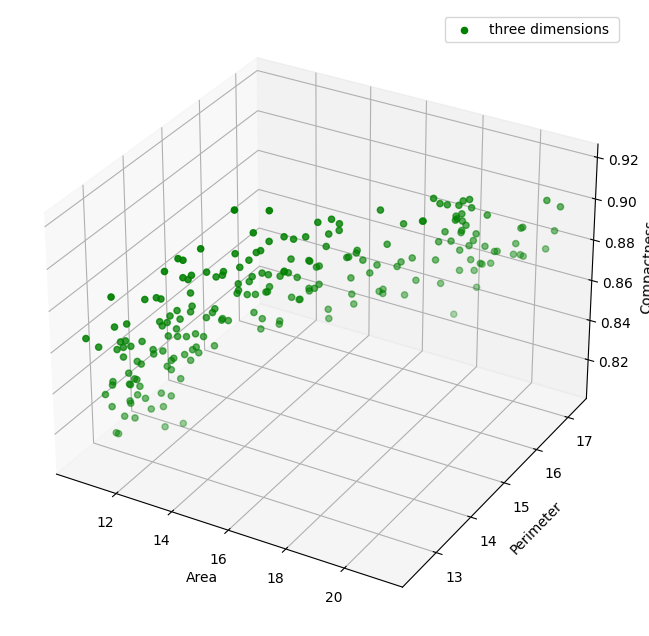

In [ ]:
# Q1
# read data for 3 dimension
x1 = df.loc[:,["Area","Perimeter","Compactness","Class"]]
y1 = x1.to_numpy()
# Create a 3D plot
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(projection='3d')

# Plot data points with different shapes
ax.scatter(y1[:,0], y1[:,1], y1[:,2], marker='o', label='three dimensions ', color="g")

# Set labels for each axis
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Compactness')

ax.legend()
plt.show()

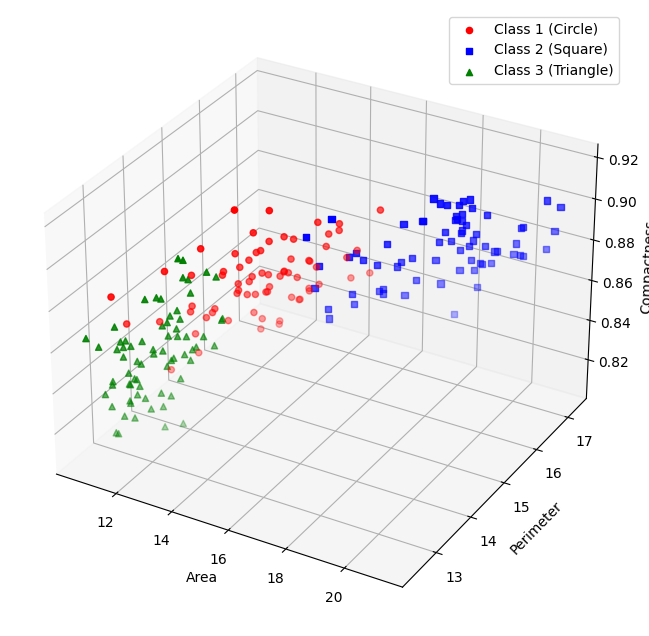

In [ ]:
# Q2
# Separate data by class
class1 = x1.loc[x1.Class == 1,["Area","Perimeter","Compactness"]].to_numpy()
class2 = x1.loc[x1.Class == 2,["Area","Perimeter","Compactness"]].to_numpy()
class3 = x1.loc[x1.Class == 3,["Area","Perimeter","Compactness"]].to_numpy()

# Create a 3D plot
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(projection='3d')

# Plot data points with different shapes
ax.scatter(*zip(*class1), marker='o', label='Class 1 (Circle)', color = "r")
ax.scatter(*zip(*class2), marker='s', label='Class 2 (Square)', color = "b")
ax.scatter(*zip(*class3), marker='^', label='Class 3 (Triangle)', color = "g")

# Set labels for each axis
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Compactness')

ax.legend()
plt.show()

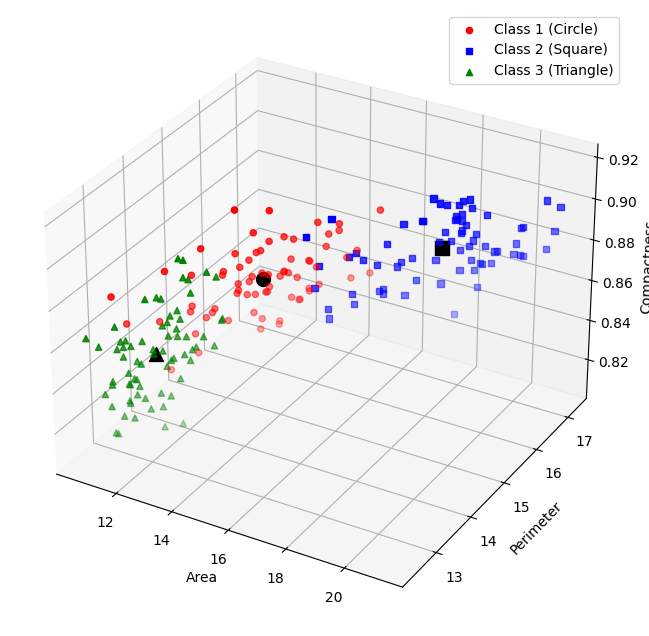

In [ ]:
# Q3
# Separate data by class
class1 = x1.loc[x1.Class == 1,["Area","Perimeter","Compactness"]].to_numpy()
class2 = x1.loc[x1.Class == 2,["Area","Perimeter","Compactness"]].to_numpy()
class3 = x1.loc[x1.Class == 3,["Area","Perimeter","Compactness"]].to_numpy()

# mean
class1_mean = np.mean(class1, axis=0)
class2_mean = np.mean(class2, axis=0)
class3_mean = np.mean(class3, axis=0)

# Create a 3D plot
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(projection='3d')

# Plot data points with different shapes
ax.scatter(*zip(*class1), marker='o', label='Class 1 (Circle)', color = "r")
ax.scatter(*zip(*class2), marker='s', label='Class 2 (Square)', color = "b")
ax.scatter(*zip(*class3), marker='^', label='Class 3 (Triangle)', color = "g")

# plot mean
ax.scatter(class1_mean[0], class1_mean[1], class1_mean[2], s=100, marker='o', color='black')
ax.scatter(class2_mean[0], class2_mean[1], class2_mean[2], s=100, marker='s', color='black')
ax.scatter(class3_mean[0], class3_mean[1], class3_mean[2], s=100, marker='^', color='black')

# Set labels for each axis
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Compactness')

ax.legend()
plt.show()

In [ ]:
D = df.loc[:,['Area', 'Perimeter','Compactness']].to_numpy()

# Mean Vector
mean_vector = np.mean(D, axis = 0)

# Centered data matrix
centered_3d= D-mean_vector

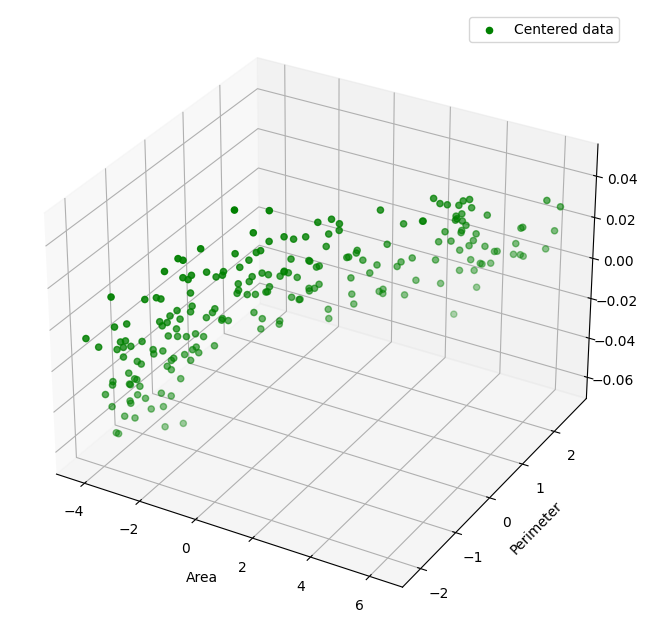

In [ ]:
# Q4
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(projection='3d')

# plot centered data set
ax.scatter(centered_3d[:, 0], centered_3d[:, 1], centered_3d[:,2], marker='o', label='Centered data', color="g")

# Set labels for each axis
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')

ax.legend()
plt.show()

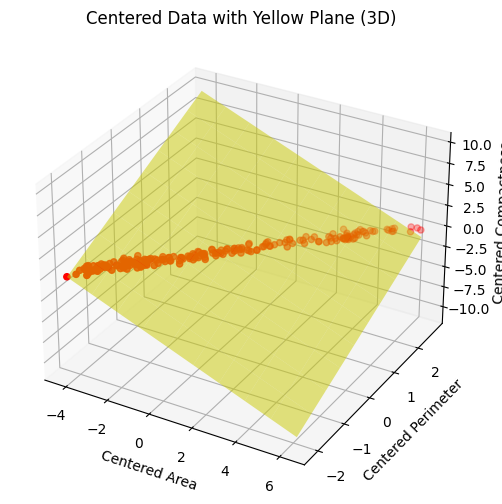

In [ ]:
#Q5
normal_vector1 = np.array([1, -2, 1])
normal_vector2 = np.array([2, 1, 0])

# Create a grid for the plane
xx, yy = np.meshgrid(np.linspace(centered_3d[:, 0].min(), centered_3d[:, 0].max(), 10),
                     np.linspace(centered_3d[:, 1].min(), centered_3d[:, 1].max(), 10))
zz = (-normal_vector1[0] * xx - normal_vector1[1] * yy) / normal_vector1[2]


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centered_3d[:, 0], centered_3d[:, 1], centered_3d[:, 2], marker='o', color="red")

# # Plot the plane
ax.plot_surface(xx, yy, zz, color='yellow', alpha=0.5)

ax.set_xlabel('Centered Area')
ax.set_ylabel('Centered Perimeter')
ax.set_zlabel('Centered Compactness')
ax.set_title('Centered Data with Yellow Plane (3D)')
plt.show()

In [ ]:
#Q6-1
cov_3d = np.dot(centered_3d.T,centered_3d)
print(cov_3d)

[[1.76946731e+03 7.89694629e+02 8.74091626e+00]
 [7.89694629e+02 3.56455393e+02 3.41337779e+00]
 [8.74091626e+00 3.41337779e+00 1.16695010e-01]]


In [ ]:
#Q6-2
s_3d=len(centered_3d)*cov_3d
print(s_3d)

[[3.71588136e+05 1.65835872e+05 1.83559241e+03]
 [1.65835872e+05 7.48556325e+04 7.16809335e+02]
 [1.83559241e+03 7.16809335e+02 2.45059520e+01]]


In [ ]:
#Q6-3
eigenvalues_3d, eigenvectors_3d = np.linalg.eig(s_3d)
print(eigenvalues_3d)
print(eigenvectors_3d)

[4.45748173e+05 7.17127560e+02 2.97333830e+00]
[[-0.91288849 -0.40396225 -0.05872912]
 [-0.40818514  0.90489481  0.12062451]
 [-0.00441592 -0.13408908  0.99095944]]


In [ ]:
#Q6-4
if not np.allclose(np.eye(len(eigenvectors_3d)), np.dot(eigenvectors_3d.T, eigenvectors_3d)):
    eigenvectors_3d = orth(eigenvectors_3d)
print(eigenvectors_3d)

[[-0.91288849 -0.40396225 -0.05872912]
 [-0.40818514  0.90489481  0.12062451]
 [-0.00441592 -0.13408908  0.99095944]]


In [ ]:
#Q6-5
indices = np.argsort(eigenvalues_3d)[-2:]
u1 = eigenvectors_3d[:, indices[0]]
u2 = eigenvectors_3d[:, indices[1]]
print(u1)
print()
print(u2)

In [ ]:
#Q6-6
projected_points_u1 = np.dot(centered_3d, u1)
projected_points_u2 = np.dot(centered_3d, u2)
print(projected_points_u1)
print()
print(projected_points_u2)

[ 8.73918986e-02 -4.77834473e-03 -2.03994855e-01 -1.56672218e-01
 -1.36705147e-01 -1.30436598e-01 -2.56195072e-04 -1.20368864e-01
  9.45022683e-02 -2.05561991e-02  9.66285715e-02 -3.22161705e-02
 -1.03473077e-01 -2.12189593e-02 -1.39082837e-02 -1.52489208e-01
 -3.19862215e-01 -1.72418702e-01 -2.62413118e-01 -3.54385806e-02
  1.35286180e-01  2.69485898e-02 -1.12498685e-01 -8.42719798e-02
  1.16701549e-01 -5.90493250e-04  1.59061592e-02  4.86075423e-02
 -4.67570681e-02  7.79711718e-02  1.33635456e-02  8.47823373e-02
  1.73349976e-01  1.41011860e-02  2.65155869e-02 -1.19121051e-01
  9.64503379e-02 -1.64124087e-01 -1.78670121e-02 -1.26142303e-01
 -1.15797727e-01 -9.93844678e-02 -2.35610944e-01  7.06387481e-03
 -1.27183066e-01 -4.78654123e-02 -2.74206564e-02 -5.92285818e-02
 -1.37737540e-02  9.56005839e-02  2.39770847e-02 -6.21819324e-02
  1.92623357e-01 -4.52867802e-02  1.71200772e-01  1.17657843e-01
 -3.42849202e-02 -1.50236845e-01 -2.63973177e-02  1.24431130e-01
 -1.52722744e-01 -2.86200

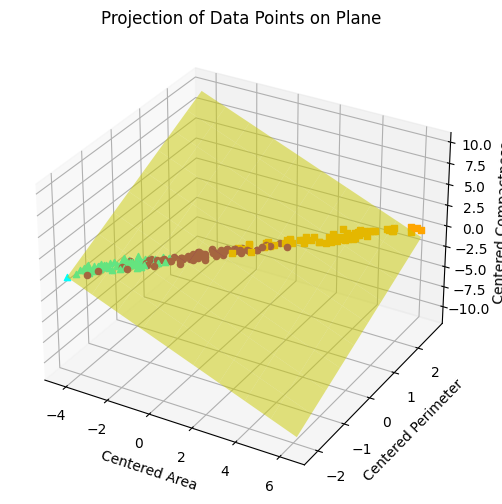

In [ ]:
#Q-7

projections = []
centered_area = centered_3d[:, 0] - centered_3d[:, 0].mean()
centered_perimeter = centered_3d[:, 1] - centered_3d[:, 1].mean()
centered_compactness = centered_3d[:, 2] - centered_3d[:, 2].mean()

for i in range(len(projected_points_u1)):
    # Calculate the projection of the centered data point onto the plane
    point = np.array([centered_area[i], centered_perimeter[i], centered_compactness[i]])

    # Calculate the projection using the dot product with the normal vectors
    projection = np.dot(point, u1) / np.linalg.norm(u1) ** 2 * u1 + np.dot(point, u2) / np.linalg.norm(u2) ** 2 * u2

    projections.append(projection)

class_labels = df['Class']
# Create a new 3D scatter plot for centered data
fig_centered = plt.figure(figsize=(8, 6))
ax_centered = fig_centered.add_subplot(111, projection='3d')

# Define different shapes for the classes
class_info = class_labels.unique()
class_shapes = ['o', 's', '^']

# Plot the plane
ax_centered.plot_surface(xx, yy, zz, color='yellow', alpha=0.5)

# Define colors for the projected points
projection_colors = ['purple', 'orange', 'cyan']

# Plot the projected points on the plane with the same shape but smaller size
for i in range(len(projections)):
    shape = class_shapes[class_labels.iloc[i] - 1]
    color = projection_colors[class_labels.iloc[i] - 1]  # Color based on class
    label = f'Class {class_labels.iloc[i]}'  # Class label
    ax_centered.scatter(projections[i][0], projections[i][1], projections[i][2],
                        c=color, marker=shape, s=20)  # Include class label

# Add labels and a title
ax_centered.set_xlabel('Centered Area')
ax_centered.set_ylabel('Centered Perimeter')
ax_centered.set_zlabel('Centered Compactness')
ax_centered.set_title('Projection of Data Points on Plane')



# Show the plot

plt.show()

In [ ]:
#Q6-8
basis_matrix = np.column_stack((u1, u2))
new_coordinates_2d = np.dot(centered_3d, basis_matrix)
print(new_coordinates_2d.ndim)
print()
print(new_coordinates_2d)

2

[[-4.91128172e-01  8.73918986e-02]
 [-3.40651598e-02 -4.77834473e-03]
 [ 7.00362375e-01 -2.03994855e-01]
 [ 1.17243192e+00 -1.56672218e-01]
 [-1.35584089e+00 -1.36705147e-01]
 [ 5.69263912e-01 -1.30436598e-01]
 [ 1.72043763e-01 -2.56195072e-04]
 [ 8.60661832e-01 -1.20368864e-01]
 [-1.99487653e+00  9.45022683e-02]
 [-1.73576757e+00 -2.05561991e-02]
 [-4.95203841e-01  9.66285715e-02]
 [ 9.09252586e-01 -3.22161705e-02]
 [ 1.09416580e+00 -1.03473077e-01]
 [ 1.17830956e+00 -2.12189593e-02]
 [ 1.21891358e+00 -1.39082837e-02]
 [ 3.48965823e-01 -1.52489208e-01]
 [ 1.08029833e+00 -3.19862215e-01]
 [-8.47087233e-01 -1.72418702e-01]
 [ 2.77050394e-01 -2.62413118e-01]
 [ 2.34601431e+00 -3.54385806e-02]
 [ 6.92706267e-01  1.35286180e-01]
 [ 7.95435671e-01  2.69485898e-02]
 [-1.08173291e+00 -1.12498685e-01]
 [ 3.06905561e+00 -8.42719798e-02]
 [-2.30227835e-01  1.16701549e-01]
 [-1.47079509e+00 -5.90493250e-04]
 [ 1.99461246e+00  1.59061592e-02]
 [ 2.28699190e+00  4.86075423e-02]
 [ 8.28047206e-01